In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import mysql.connector

In [4]:
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="",
  database="scraping_data"
)
mycursor = mydb.cursor()

In [5]:
def loadData():
    list=[]
    query="SELECT * FROM matching"
    mycursor.execute(query)
    results = mycursor.fetchall()
    for res in results:
        dict={
            'id':res[0],
            'prod_id_one':res[1],
            'prod_id_two':res[2],
            'name_score':res[3],
            'name_number_rate':res[4],
            'des_score':res[5],
            'brand_score':res[6],
            'score':res[7],
            'matching_by':res[8]
            }
        list.append(dict)
    return list

In [61]:
list=loadData()
df = pd.DataFrame(list)
# df.head(216)
df

,id,prod_id_one,prod_id_two,name_score,name_number_rate,des_score,brand_score,score,matching_by
0,1,35,8764,50,14,71,25,32,name/des/brand
1,2,35,8766,55,28,71,100,61,name/des/brand
2,3,35,8767,55,28,71,100,61,name/des/brand
3,4,35,9281,60,28,71,100,63,name/des/brand
4,5,35,9282,52,12,57,100,54,name/des/brand
...,...,...,...,...,...,...,...,...,...
9931,9932,88,9553,39,0,80,0,17,name/des/brand
9932,9933,88,9554,50,11,80,25,31,name/des/brand
9933,9934,88,9555,43,0,80,0,18,name/des/brand
9934,9935,88,9556,43,0,80,0,18,name/des/brand


In [7]:
df.isnull().sum()

id                  0
prod_id_one         0
prod_id_two         0
name_score          0
name_number_rate    0
des_score           0
brand_score         0
score               0
matching_by         0
dtype: int64

In [8]:
new=df.iloc[:7000]
(new['name_number_rate'] == 0).sum()

4275

In [9]:
new['name_number_rate'] = new['name_number_rate'].replace(0, 1)
new['brand_score'] = new['brand_score'].replace(0, 1)


c:\users\wissem\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\users\wissem\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
(new['brand_score'] == 0).sum()

0

In [25]:
def classifier(row):
    if row.score > 50:
        return 1
    return 0

In [26]:
new['match']= new.apply(classifier, axis=1)

c:\users\wissem\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
new

,id,prod_id_one,prod_id_two,name_score,name_number_rate,des_score,brand_score,score,matching_by,match
0,1,35,8764,50,14,71,25,32,name/des/brand,0
1,2,35,8766,55,28,71,100,61,name/des/brand,1
2,3,35,8767,55,28,71,100,61,name/des/brand,1
3,4,35,9281,60,28,71,100,63,name/des/brand,1
4,5,35,9282,52,12,57,100,54,name/des/brand,1
...,...,...,...,...,...,...,...,...,...,...
6995,6996,75,9425,52,10,80,100,55,name/des/brand,1
6996,6997,75,9426,53,10,80,100,55,name/des/brand,1
6997,6998,75,9427,46,9,80,1,22,name/des/brand,0
6998,6999,75,9428,48,11,80,1,23,name/des/brand,0


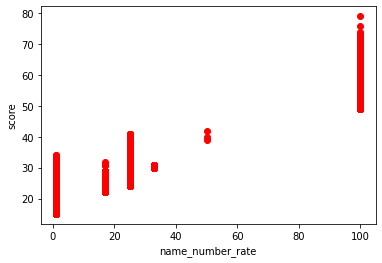

In [40]:
%matplotlib inline
plt.xlabel('name_number_rate')
plt.ylabel('score')
plt.scatter(new.brand_score, new.score , color='red')

In [74]:
pred = df.iloc[7000:9935]
p = pred[['name_score', 'name_number_rate' ,'des_score' ,'brand_score', 'score']].values
pred

,id,prod_id_one,prod_id_two,name_score,name_number_rate,des_score,brand_score,score,matching_by
7000,7001,75,9430,49,0,80,100,51,name/des/brand
7001,7002,75,9431,48,0,80,0,20,name/des/brand
7002,7003,75,9432,47,0,80,0,19,name/des/brand
7003,7004,75,9433,50,10,80,100,55,name/des/brand
7004,7005,75,9434,47,10,80,0,22,name/des/brand
...,...,...,...,...,...,...,...,...,...
9930,9931,88,9552,64,11,80,25,36,name/des/brand
9931,9932,88,9553,39,0,80,0,17,name/des/brand
9932,9933,88,9554,50,11,80,25,31,name/des/brand
9933,9934,88,9555,43,0,80,0,18,name/des/brand


In [75]:
X = new[['name_score', 'name_number_rate' ,'des_score' ,'brand_score', 'score']].values
y = new[['match']].values

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,\
                                                    random_state=4, stratify=y)

In [77]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [78]:
models = {
 'Perceptron' : Perceptron(max_iter=40, eta0=0.1, random_state=1),
 'LogisticRegression' : LogisticRegression(C=100.0, random_state=1),
 'LinearSVC' : SVC(kernel='linear', C=1.0, random_state=1),
 'KernelizedSVC' : SVC(kernel='rbf', random_state=1, gamma=5.0, C=1.0),
 'MLP' : MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)}

In [79]:
for model_name, model in models.items():
    model.fit(X_train_std, y_train.ravel())
#     accurcy = model.score(X_test, y_test)
#     print(accurcy)
    y_pred = model.predict(X_test_std)
    
    print(model_name)
    print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))
    print('Fscore: %.2f' % f1_score(y_test, y_pred, labels=np.unique(y_pred)))
    print(classification_report(y_test, y_pred, labels=[1, 0], target_names=['match', 'no-match']))
    pred = model.predict(p)
    print(pred)
    print('')

Perceptron
Accuracy: 1.00
Fscore: 1.00
              precision    recall  f1-score   support

       match       1.00      1.00      1.00       429
    no-match       1.00      1.00      1.00      1671

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100

[1 1 1 ... 1 1 1]

LogisticRegression
Accuracy: 1.00
Fscore: 1.00
              precision    recall  f1-score   support

       match       1.00      1.00      1.00       429
    no-match       1.00      1.00      1.00      1671

    accuracy                           1.00      2100
   macro avg       1.00      1.00      1.00      2100
weighted avg       1.00      1.00      1.00      2100

[1 1 1 ... 1 1 1]

LinearSVC
Accuracy: 1.00
Fscore: 0.99
              precision    recall  f1-score   support

       match       0.98      1.00      0.99       429
    no-match       1.00      1.00      1.00      1671

    accuracy        

In [74]:
reg.predict([[60, 75, 79, 100]])

array([[77.94101281]])